In [121]:
import pandas as pd 
import numpy as np

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [124]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: >

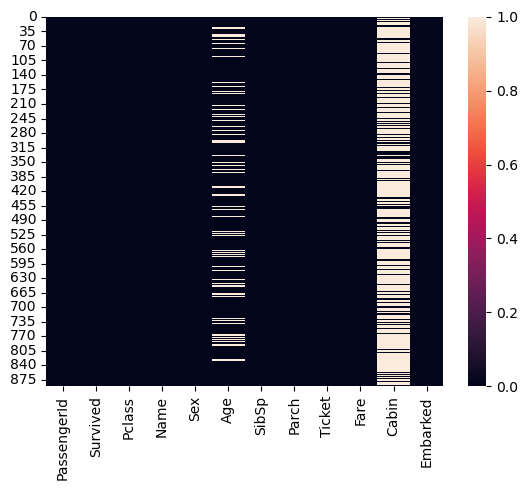

In [126]:
sns.heatmap(train.isnull())

<Axes: >

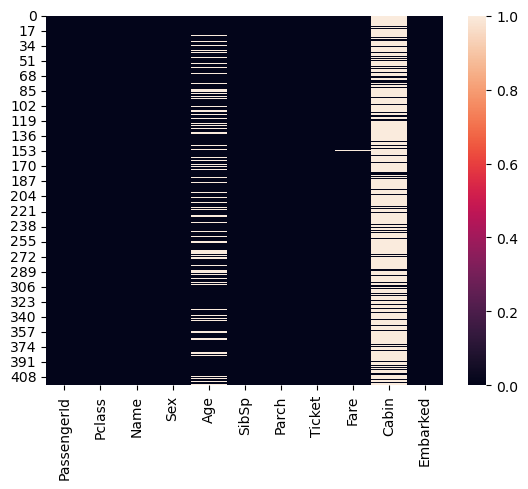

In [127]:
sns.heatmap(test.isnull())

<Axes: xlabel='Pclass', ylabel='Age'>

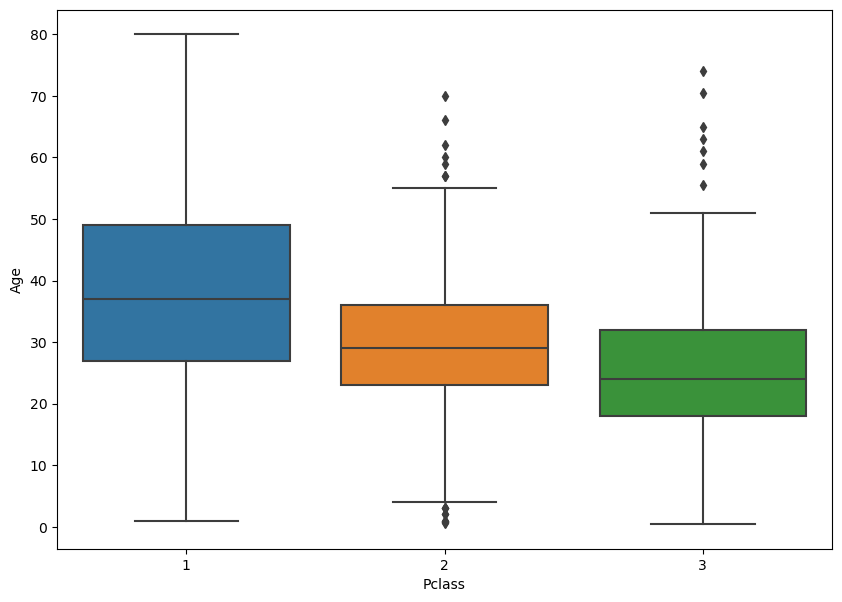

In [128]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)


<Axes: xlabel='Pclass', ylabel='Age'>

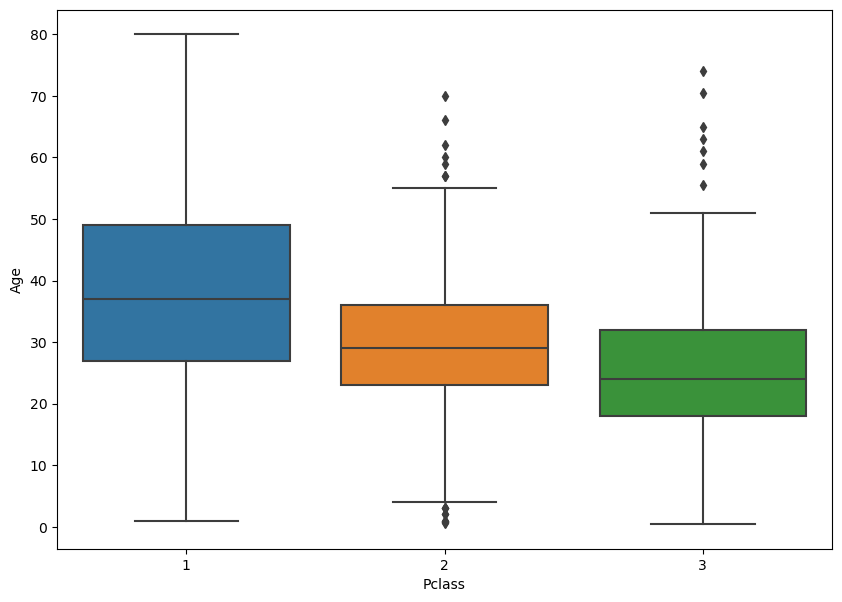

In [129]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [130]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [131]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

/var/folders/k1/pmvt6ctn38gfzvw1vz44d5gr0000gn/T/ipykernel_645/2865144740.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/k1/pmvt6ctn38gfzvw1vz44d5gr0000gn/T/ipykernel_645/2865144740.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]
/var/folders/k1/pmvt6ctn38gfzvw1vz44d5gr0000gn/T/ipykernel_645/2865144740.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/k1

<Axes: >

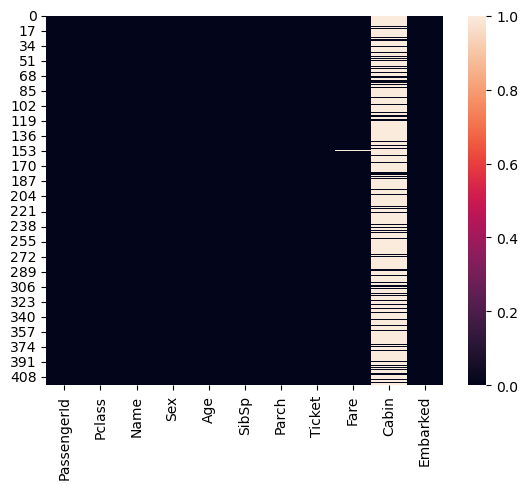

In [132]:
sns.heatmap(test.isnull())

In [133]:
Sex = pd.get_dummies(train['Sex'],drop_first=True)

In [134]:
Embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [135]:
sex = pd.get_dummies(test['Sex'],drop_first=True)

In [136]:
embarked = pd.get_dummies(test['Embarked'],drop_first=True)

In [137]:
train = pd.concat([train,Sex,Embarked],axis=1)

In [138]:
test = pd.concat([test,sex,embarked],axis=1)

In [139]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,False,True


In [140]:
train.drop(['Sex','Embarked','Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [141]:
test.drop(['Sex','Embarked','Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [142]:
train.dropna(inplace=True)

In [143]:
test.dropna(inplace=True)

In [144]:
X= train.drop('Survived',axis=1)

In [145]:
y = train['Survived']

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
logmodel = LogisticRegression(max_iter=1000)

In [148]:
logmodel.fit(X,y)

LogisticRegression(max_iter=1000)

In [149]:
predictions = logmodel.predict(test)

In [163]:
test1 = pd.read_csv("test.csv")

In [164]:
test1.drop(['Name','Sex','Pclass','Age','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [165]:
test1.set_index('PassengerId',inplace=True)

In [169]:
test1.isnull().count()

Fare    418
dtype: int64